In [46]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
data = loadmat('data/ex7data2.mat')

In [48]:
data_tmp = data['X']
x = data_tmp[:,0:1]
y = data_tmp[:,1:]

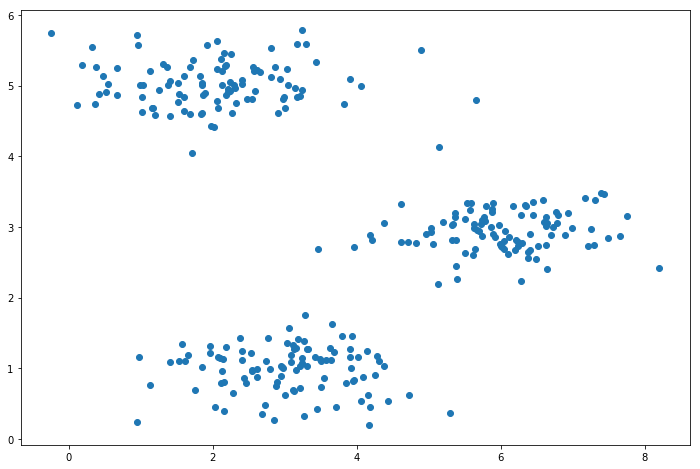

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)

In [50]:
no_centroids = 3

So here instead of randomly initializing the centroids, we'll select it from the data given.

In [85]:
cent_x = np.random.choice(a=x.ravel(), size=(no_centroids,1))
cent_y = np.random.choice(a=y.ravel(), size=(no_centroids,1))
cent = np.concatenate((cent_x, cent_y), axis = 1)

In [86]:
cent

array([[ 5.52908677,  2.88845269],
       [ 3.63586049,  3.19960026],
       [ 5.69797866,  5.20854212]])

In [87]:
belong = np.zeros(len(x))

In [88]:
iter = 100
for j in range(1,iter):
    belong = (np.square(x - cent[:,0]) + np.square(y- cent[:,1])).argmin(axis = 1)
    for i in range(0, no_centroids):
        cent[i,0] = x[belong == i].mean()
        cent[i,1] = y[belong == i].mean()

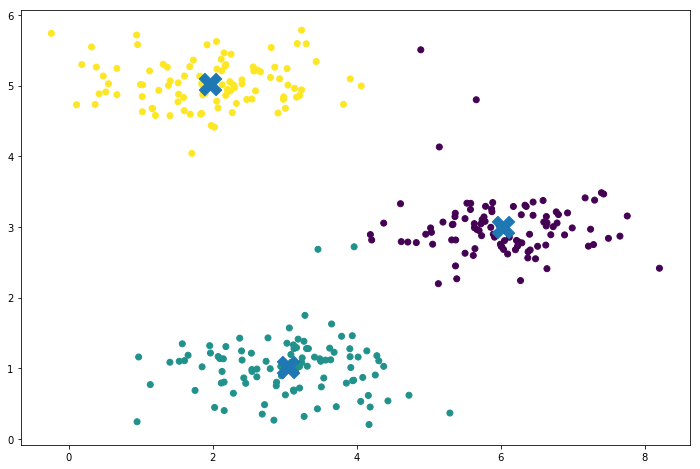

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(x, y, c=belong,)
plt.scatter(cent[:,0], cent[:,1], marker='X', s=500)